# 二分类的例子

array([ 3.01796521, -5.04447145])

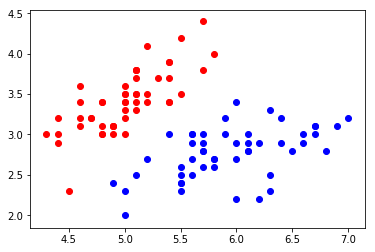

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data
y = iris.target
# 目前咋们只支持2分类
X = X[y<2, :2]
y = y[y<2]
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")
from playML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)
from playML.LogisticRegression import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.coef_

在前面的例子中
$$
\theta * x > 0 代表了一类 <0 则代表了另一类
$$
那么0是它的一个决策边界
# 下面我们来显示的看下这个决策边界到底是多少
![dec](img/dec.png)

## 当我们只有两个特征时
![twof](img/twof.png)

In [2]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [3]:
log_reg.interception_

-0.6937719272911228

In [4]:
def x2(x1):
    return (-log_reg.interception_ -log_reg.coef_[0] * x1) / log_reg.coef_[1]

In [5]:
x1_plot = np.linspace(4,8,1000)
x2_plot = x2(x1_plot)

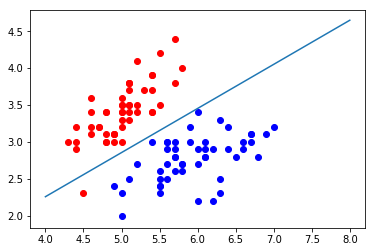

In [6]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")
plt.plot(x1_plot, x2_plot)

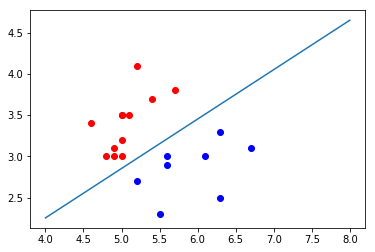

In [7]:
# 可以看到有一个点是在训练数据集上分类是错误的
# 下面的是在测试数据集上的表现
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color="red")
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color="blue")
plt.plot(x1_plot, x2_plot)

## 不规则的决策边界绘制
![fea](img/fea.png)

In [8]:
def plot_decision_boundry(model, axis):
    # meshgrid 可以参考项目03-第3章JupyterNotebook_numpy和map/numpy.ipynb
    # 其实就是分别生成按行看的矩阵和 按列看的矩阵
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    return

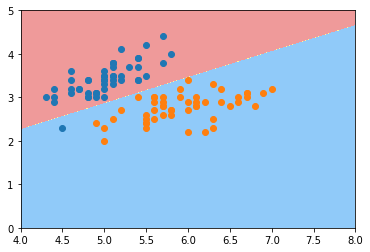

In [15]:
plot_decision_boundry(log_reg, [4,8,0,5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# KNN 算法的决策边界

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
knn_clf.score(X_test, y_test)

1.0

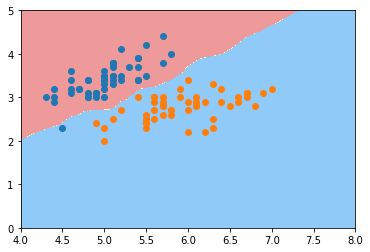

In [16]:
plot_decision_boundry(knn_clf, [4,8,0,5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [17]:
# 对于KNN 如果分类个数k更多时, 那么我们类别更大时会怎么样呢?
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

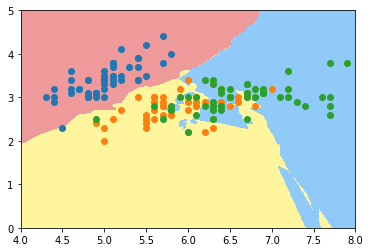

In [20]:
# iris data 总共有3类结果哈
# 这个和我们前面的colormap是对应的
# 绘制的时候只取的前面两个特征 但是分成的是3类
plot_decision_boundry(knn_clf_all, [4,8,0,5])
plt.scatter(iris.data[iris.target ==0, 0], iris.data[iris.target ==0, 1])
plt.scatter(iris.data[iris.target ==1, 0], iris.data[iris.target ==1, 1])
plt.scatter(iris.data[iris.target ==2, 0], iris.data[iris.target ==2, 1])
plt.show()

In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

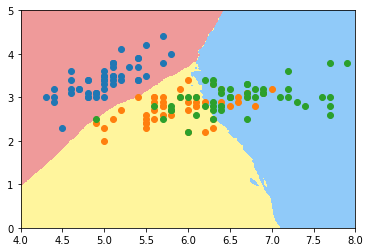

In [23]:
# 上图中很明显发生了过拟合 得到的图像很复杂
#尝试设置k的值
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:, :2], iris.target)
plot_decision_boundry(knn_clf_all, [4,8,0,5])
plt.scatter(iris.data[iris.target ==0, 0], iris.data[iris.target ==0, 1])
plt.scatter(iris.data[iris.target ==1, 0], iris.data[iris.target ==1, 1])
plt.scatter(iris.data[iris.target ==2, 0], iris.data[iris.target ==2, 1])
plt.show()

In [ ]:
# 下一节将加入多项式回归来得到非直线的决策边界